In [1]:
import pickle
from pathlib import Path
import numpy as np

In [2]:
source = Path("../data/") / "20250512" / "processed" / "ishii0005_ica_epochs.pkl"

# pickleのEEGデータを読み込む
with open(source, 'rb') as f:
    raw = pickle.load(f)

In [3]:
epochs  = raw['epochs']
labels = raw['labels']

In [4]:
def plot_topomap_times(idx, interval=0.5):
    epochs[idx].average().plot_topomap(times=np.arange(epochs.tmin, epochs.tmax, interval), ch_type='eeg', show=True)
    print(f"Epoch for task {labels[idx]} topomap plotted.")


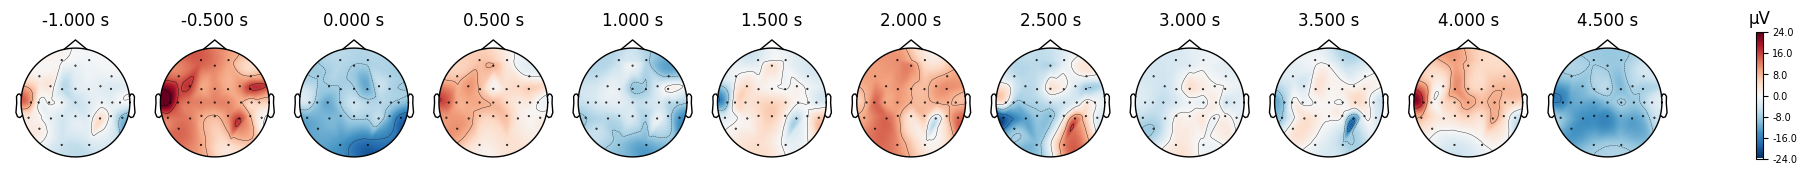

Epoch for task 3 topomap plotted.


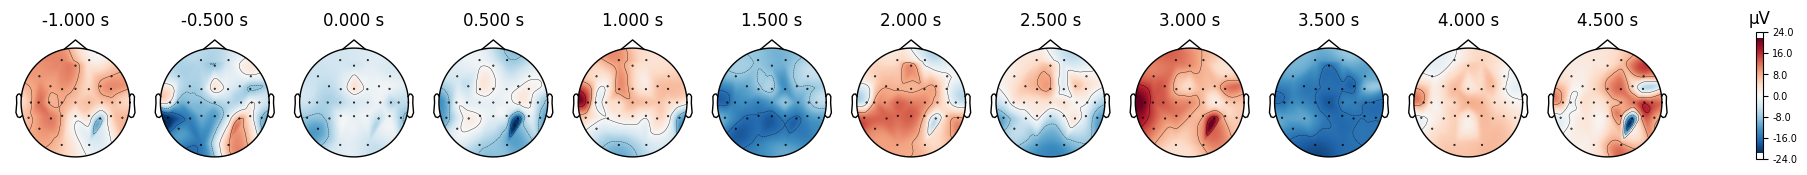

Epoch for task 9999 topomap plotted.


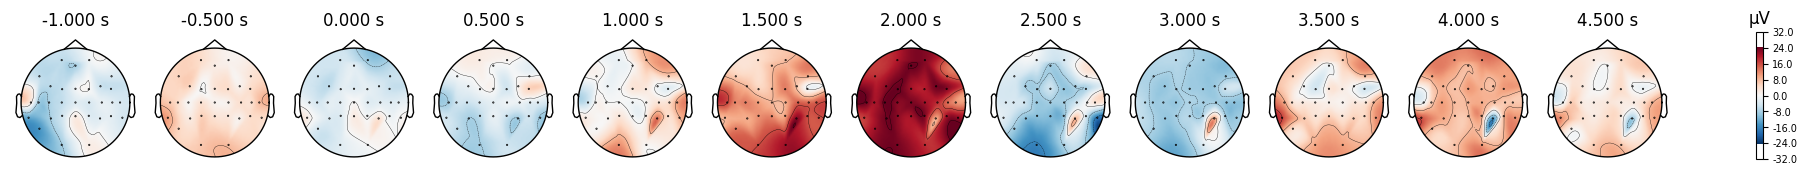

Epoch for task 1 topomap plotted.


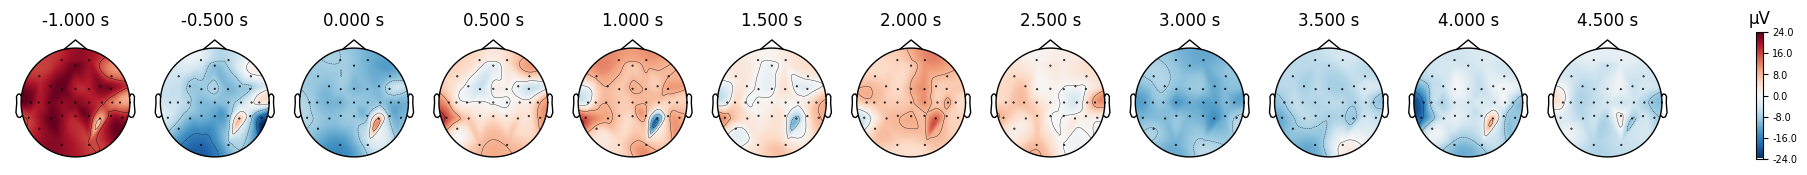

Epoch for task 9999 topomap plotted.


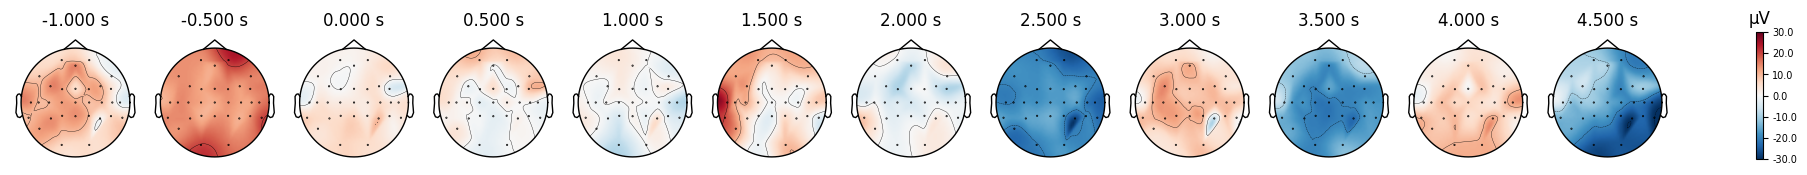

Epoch for task 1 topomap plotted.


In [5]:
for i in range(5):
    plot_topomap_times(i)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import Normalize

def create_advanced_topomap_animation(evoked):
    """
    より高度なtopomapアニメーション
    """
    # 時間軸の設定
    times = np.arange(evoked.tmin, evoked.tmax, 0.01)
    time_indices = [evoked.time_as_index(t)[0] for t in times]
    
    # カラーマップの設定
    vmin, vmax = np.percentile(evoked.data, [5, 95])
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 時系列プロット用の準備
    ch_to_plot = mne.pick_channels(evoked.ch_names, ['Cz'])  # 例：Czチャンネル
    
    def animate(frame):
        # topomapをクリア
        ax1.clear()
        ax2.clear()
        
        time_idx = time_indices[frame]
        current_time = times[frame]
        
        # topomap
        im, _ = mne.viz.plot_topomap(
            evoked.data[:, time_idx],
            evoked.info,
            axes=ax1,
            show=False,
            vmin=vmin,
            vmax=vmax,
            cmap='RdBu_r'
        )
        ax1.set_title(f'Topomap at {current_time:.3f} s')
        
        # 時系列プロット
        ax2.plot(evoked.times, evoked.data[ch_to_plot[0], :], 'b-', alpha=0.7)
        ax2.axvline(current_time, color='r', linestyle='--', linewidth=2)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Amplitude (µV)')
        ax2.set_title('Time Series (Cz)')
        ax2.grid(True, alpha=0.3)
        
        return [im]
    
    # アニメーション作成
    ani = animation.FuncAnimation(
        fig, animate, frames=len(times), 
        interval=50, blit=False, repeat=True
    )
    
    # MP4として保存
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=20, metadata=dict(artist='MNE-Python'), bitrate=1800)
    ani.save(save_path, writer=writer)
    
    return ani

# 使用例
# ani = create_advanced_topomap_animation(evoked, 'advanced_topomap.mp4')

Initializing animation...
Initializing animation...


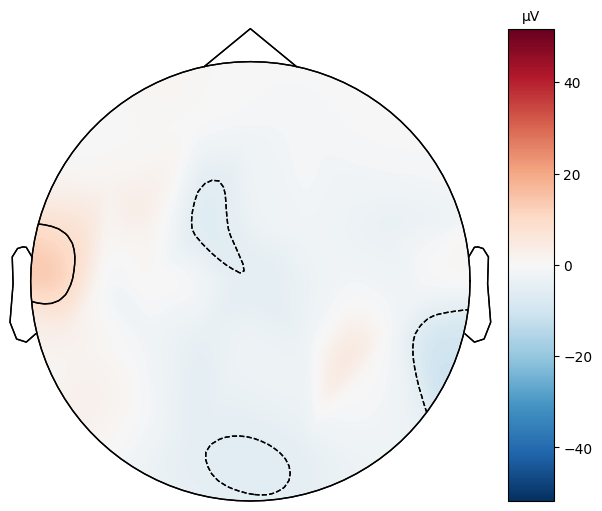

In [ ]:
from matplotlib import rc

idx = 0
fig, anim = epochs[idx].average().animate_topomap(times=np.arange(epochs.tmin, epochs.tmax, 0.5), ch_type='eeg', show=False)
